In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [3]:
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()

In [4]:
print(diabetes.data.shape, diabetes.target.shape)

(442, 10) (442,)


In [5]:
x = diabetes.data[:,2]
y = diabetes.target

In [8]:
w = 1.0
b = 1.0

In [11]:
y_hat = x[0]*w + b
print(y_hat)

1.0616962065186832


In [14]:
w_inc = w+0.1
y_hat_inc = x[0]*w_inc + b
print(y_hat_inc)

1.0678658271705517


In [15]:
# w값 조정후 얼마나 변했는지 확인하기
w_rate = (y_hat_inc - y_hat) / (w_inc - w)
print(w_rate)

0.06169620651868429


In [16]:
w_new = w + w_rate
print(w_new)

1.0616962065186843


In [17]:
b_inc = b+0.1
y_hat_inc = x[0]*w + b_inc
print(y_hat_inc)

1.1616962065186833


In [18]:
b_rate = (y_hat_inc - y_hat)/(b_inc - b)
print(b_rate)

1.0


In [19]:
err = y[0] - y_hat
w_new = w + w_rate*err
b_new = b + 1*err
print(w_new, b_new)

10.250624555903848 150.9383037934813


In [20]:
y_hat = x[1] * w_new + b_new
err = y[1] - y_hat
w_rate = x[1]
w_new = w_new + w_rate*err
b_new = b_new + 1*err
print(w_new, b_new)

14.132317616380695 75.52764127612656


In [21]:
# 전체 샘플 반복하기
for x_i, y_i in zip(x,y):
    y_hat = x_i*w + b
    err = y_i - y_hat
    w_rate = x_i
    w = w + w_rate*err
    b = b + 1*err
print(w,b)

587.8654539985616 99.4093556453094


In [22]:
# 에포크 반복
for i in range(1,100):
    for x_i, y_i in zip(x,y):
        y_hat = x_i*w + b
        err = y_i - y_hat
        w_rate = x_i
        w = w + w_rate*err
        b = b + 1*err
print(w,b)

913.5973364346786 123.39414383177173


3-3 손실함수와 경사하강법의 관계를 알아보자

In [23]:
y_hat = x_i*w + b
err = y_i - y_hat
w_rate = x_i
w = w + w_rate*err

In [24]:
err = y_i - y_hat
b = b + 1*err

3-4 선형 회귀를 위한 뉴런을 만들어보자

In [32]:
class Neuron:
    
    def __init__(self):
        self.w = 1.0
        self.b = 1.0
        
    def forpass(self, x):
        y_hat = x*self.w + self.b
        return y_hat
    
    def backprop(self, x, err):
        w_grad = x*err
        b_grad = 1*err
        return w_grad, b_grad
    
    def fit(self, x, y, epochs=100):
         for i in range(epochs):
            for x_i, y_i in zip(x,y):
                y_hat = self.forpass(x_i)
                err = -(y_i - y_hat)
                w_grad, b_grad = self.backprop(x_i, err)
                self.w -= w_grad
                self.b -= b_grad

In [33]:
neuron = Neuron()
neuron.fit(x, y)

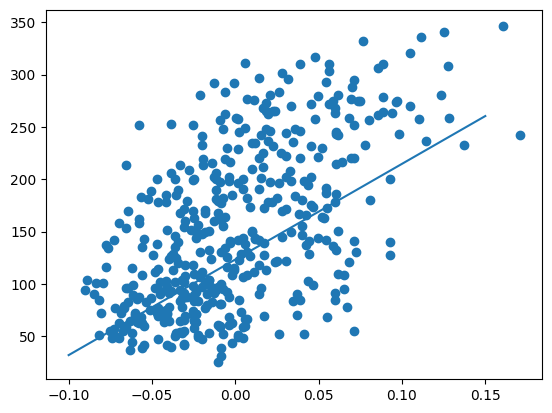

In [35]:
plt.scatter(x,y)
pt1 = (-0.1, -0.1*neuron.w + neuron.b)
pt2 = (0.15, 0.15*neuron.w + neuron.b)
plt.plot([pt1[0], pt2[0]], [pt1[1], pt2[1]])
plt.show()